In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/hellraizer/fastai/courses/ml1/')

In [3]:
from fastai.imports import *
from fastai.structured import *

In [4]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [5]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [6]:
df_raw = customers.copy()

In [8]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [9]:
df_test = pd.read_csv('./output_round1.csv')

In [12]:
df_test.drop('FraudFound_P', inplace=True, axis=1)

In [14]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [16]:
display_all(customers.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [17]:
train_cats(df_raw)

In [18]:
df_raw.Month.cat.set_categories(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], ordered=True, inplace=True)

In [19]:
df_raw.DayOfWeek.cat.set_categories(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                ordered=True, inplace=True)

In [20]:
df_raw.DayOfWeekClaimed.cat.set_categories(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday',
                                            'Sunday'], ordered=True, inplace=True)

In [21]:
df_raw.MonthClaimed.cat.set_categories(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], ordered=True, inplace=True)

In [23]:
# df_raw['MonthClaimed'][df_raw['MonthClaimed']== 0]
# df_raw.drop(df_raw[df_raw['MonthClaimed'].isna()])

In [25]:
apply_cats(df=df_test, trn=df_raw)

In [29]:
df, y, nas = proc_df(df_raw, 'FraudFound_P')
X_test,_,nas = proc_df(df_test, na_dict=nas)
df, y , nas = proc_df(df_raw, 'FraudFound_P', na_dict=nas)

In [31]:
display_all(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Age_na,DriverRating_na
0,12,5,3,7,2,2,1,1,1,3,21.0,1,6,2,6,1,12,300,1.0,4,3,4,2,4,1,1,1,4,1,3,1994,3,55526.069421,False,False
1,1,3,3,7,2,1,1,4,2,3,34.0,1,5,2,6,2,15,400,4.0,4,3,4,5,5,2,1,1,4,4,1,1994,2,59294.455571,False,False
2,10,5,5,7,2,4,11,2,2,2,47.0,1,5,2,6,3,7,400,3.0,4,3,1,6,7,1,1,1,4,4,1,1994,2,71756.941320,False,False
3,6,2,6,18,1,5,7,1,2,2,65.0,2,3,2,1,4,4,400,2.0,4,3,1,7,8,2,1,1,3,4,1,1994,3,7584.153493,False,False
4,2,1,6,7,2,1,2,3,2,2,36.0,2,5,2,6,7,14,400,1.0,4,3,1,6,6,1,1,1,1,4,1,1994,2,98545.374339,False,False


In [18]:
m = RandomForestClassifier()

m.fit(df, y)

m.score(df, y)

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, random_state = 0, test_size=0.15)

In [33]:
X_train.shape, X_valid.shape

((9830, 35), (1735, 35))

In [34]:
def error(x,y):
    print(confusion_matrix(x, y))
    print(f1_score(x, y))
    print(classification_report(x, y))
    
def print_score(m):
    res = [error(m.predict(X_train), y_train),
           error(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
#     print(res[2:])

In [22]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_train, y_train)
print_score(m)

[[9210  131]
 [  29  460]]
0.8518518518518517
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9341
           1       0.78      0.94      0.85       489

   micro avg       0.98      0.98      0.98      9830
   macro avg       0.89      0.96      0.92      9830
weighted avg       0.99      0.98      0.98      9830

[[1599   78]
 [  42   16]]
0.21052631578947364
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1677
           1       0.17      0.28      0.21        58

   micro avg       0.93      0.93      0.93      1735
   macro avg       0.57      0.61      0.59      1735
weighted avg       0.95      0.93      0.94      1735



In [23]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
15,PolicyNumber,0.147362
32,ClaimSize,0.089541
10,Age,0.069940
6,MonthClaimed,0.060964
16,RepNumber,0.057858
0,Month,0.050805
2,DayOfWeek,0.047481
3,Make,0.046445
11,Fault,0.036635
5,DayOfWeekClaimed,0.032307


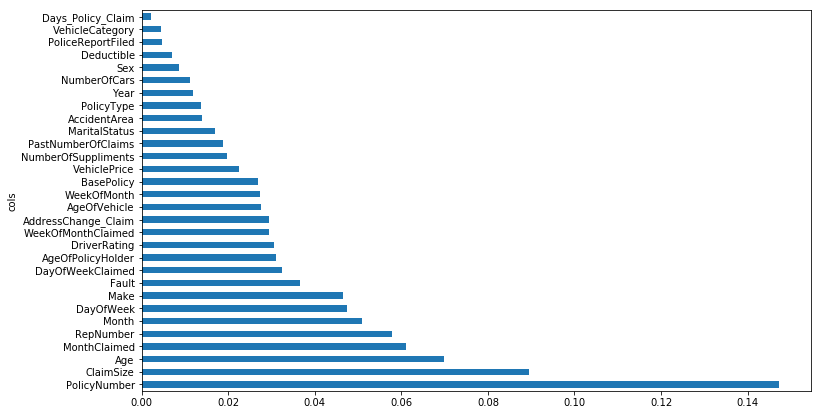

In [24]:
def plot_fi(fi): 
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [25]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)
m.fit(X_train.drop('PolicyNumber', axis=1), y_train)
res = [error(m.predict(X_train.drop('PolicyNumber', axis=1)), y_train),
           error(m.predict(X_valid.drop('PolicyNumber', axis=1)), y_valid),
           m.score(X_train.drop('PolicyNumber', axis=1), y_train), m.score(X_valid.drop('PolicyNumber', axis=1), y_valid)]
print(res)

[[9200  121]
 [  39  470]]
0.8545454545454546
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9321
           1       0.80      0.92      0.85       509

   micro avg       0.98      0.98      0.98      9830
   macro avg       0.90      0.96      0.92      9830
weighted avg       0.99      0.98      0.98      9830

[[1586   81]
 [  55   13]]
0.1604938271604938
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1667
           1       0.14      0.19      0.16        68

   micro avg       0.92      0.92      0.92      1735
   macro avg       0.55      0.57      0.56      1735
weighted avg       0.93      0.92      0.93      1735

[None, None, 0.9837232960325534, 0.9216138328530259]


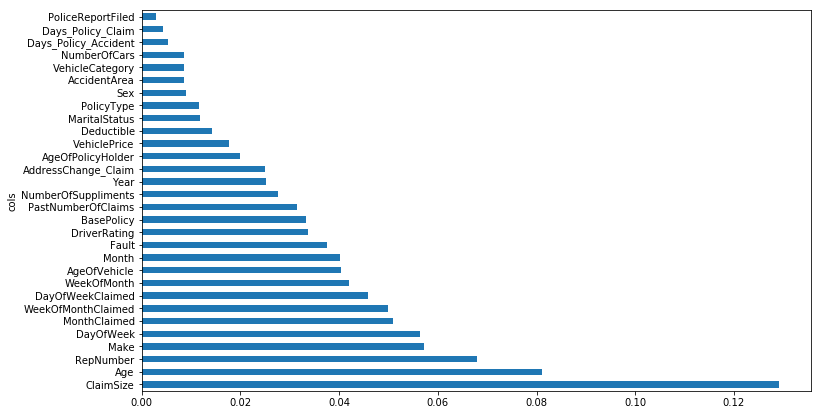

In [26]:
fi = rf_feat_importance(m, df.drop('PolicyNumber', axis=1))
plot_fi(fi[:30]);

In [27]:
m = RandomForestClassifier(n_estimators=1, n_jobs=-1, max_depth=3)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

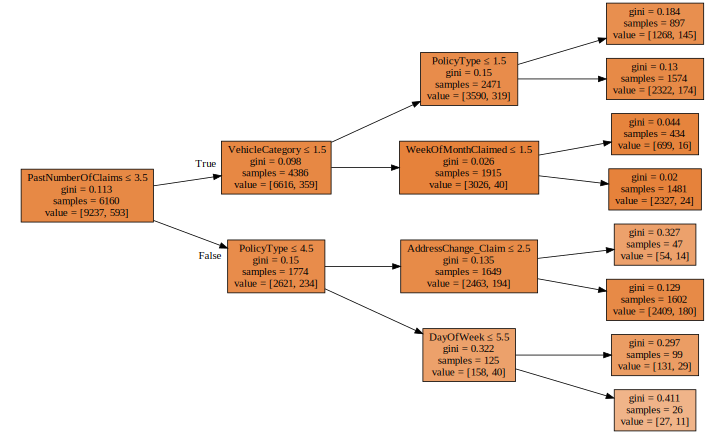

In [28]:
draw_tree(m.estimators_[0], X_valid, precision=3)

In [35]:
import lightgbm as lgb
print("LightGBM version: {}".format(lgb.__version__))

LightGBM version: 2.2.2


In [46]:
lgb_train = lgb.Dataset(X_cc_full, y_cc_full, free_raw_data=False)
# lgb_test = lgb.Dataset(X_valid, y_valid, reference=lgb_train, free_raw_data=False)

In [47]:
parameters = {'num_leaves': 2**5,
              'learning_rate': 0.05,
              'is_unbalance': True,
              'min_split_gain': 0.03,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 500

In [48]:
%%time
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

CPU times: user 4.68 s, sys: 0 ns, total: 4.68 s
Wall time: 608 ms


In [49]:
# With Policy Number
y_prob = clf.predict(X_valid)

y_pred = np.array([0 if i<0.45 else 1 for i in y_prob])

error(y_pred, y_valid)

[[1457    0]
 [ 184   94]]
0.5053763440860215
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1457
           1       1.00      0.34      0.51       278

   micro avg       0.89      0.89      0.89      1735
   macro avg       0.94      0.67      0.72      1735
weighted avg       0.91      0.89      0.87      1735



In [50]:
y_prob = clf.predict(X_test)

y_pred_test = np.array([0 if i<0.45 else 1 for i in y_prob])

In [57]:
y_pred_df = pd.DataFrame(y_pred_test.reshape(-1,1))

In [59]:
y_pred_df.columns = ['FraunFound_P']

In [61]:
y_pred_df.to_csv('test_results.csv', index=False)

In [191]:
# No Policy Number
y_prob = clf.predict(X_valid.drop('PolicyNumber', axis = 1))

y_pred = np.array([0 if i<0.5 else 1 for i in y_prob])

error(y_pred, y_valid)

[[1381   41]
 [ 260   53]]
0.2604422604422605
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1422
           1       0.56      0.17      0.26       313

   micro avg       0.83      0.83      0.83      1735
   macro avg       0.70      0.57      0.58      1735
weighted avg       0.79      0.83      0.79      1735



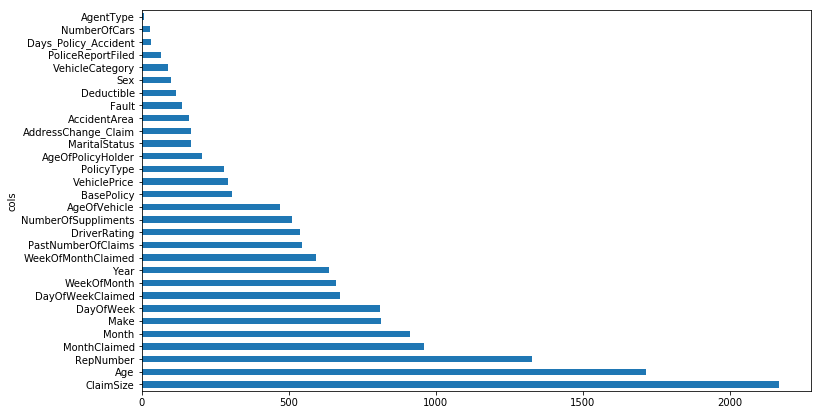

In [192]:
# Without using Policy Number
fi = gbm_feat_importance(clf, df.drop('PolicyNumber', axis=1))
plot_fi(fi[:30]);

In [172]:
def gbm_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importance()}
                       ).sort_values('imp', ascending=False)

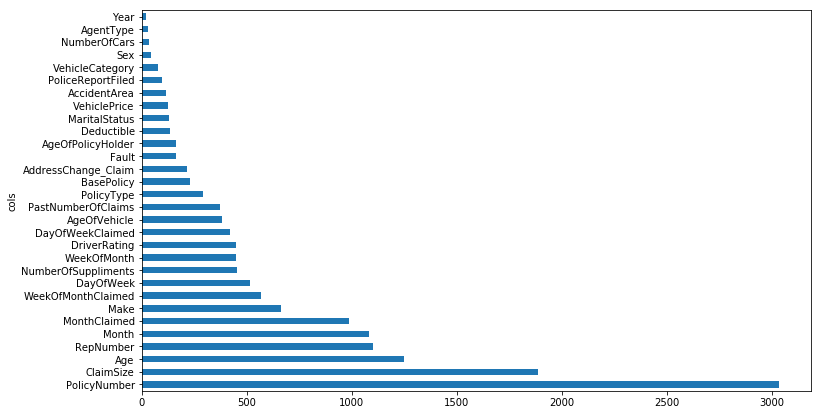

In [173]:
# With Policy Number
fi = gbm_feat_importance(clf, df)
plot_fi(fi[:30]);

In [282]:
(df_raw[(df_raw['FraudFound_P'] == 1) & (df_raw['Month'] == 'Dec')] ).shape
(df_raw[(df_raw['FraudFound_P'] == 0) & (df_raw['Month'] == 'Dec')] ).shape

(925, 34)

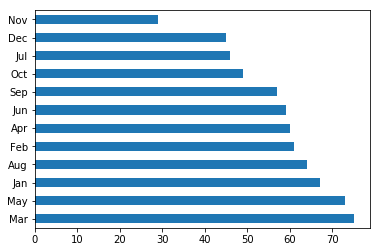

In [288]:
df_raw['Month'][df_raw['FraudFound_P'] == 1].value_counts().plot('barh')

In [268]:
df_raw['RepNumber'].value_counts()

7     800
9     760
1     754
16    739
3     733
15    729
5     729
10    728
2     714
14    713
12    708
6     703
11    697
4     696
13    681
8     681
Name: RepNumber, dtype: int64

In [266]:
(df_raw['ClaimSize'][df_raw['FraudFound_P'] == 0]).value_counts()

98545.374339    20
69101.981954    19
58488.924392    18
59263.702434    18
82211.859262    18
65937.521016    18
85555.916236    18
77167.223246    18
62888.307996    18
64586.618621    17
80258.158579    17
54029.946625    17
57166.760954    17
69029.591397    17
52942.992707    17
79417.328822    16
50099.557057    16
53715.138636    16
51716.570769    15
53404.029702    15
73871.310119    15
70530.646951    15
87808.106898    15
52253.395291    15
86532.671997    15
52494.337422    15
62194.123254    15
78329.309493    15
55526.069421    15
74391.153047    15
                ..
25649.199713     1
35443.336264     1
4022.115364      1
23291.590471     1
23264.723573     1
11960.891377     1
14918.226314     1
17811.809527     1
9486.932667      1
44663.681152     1
17356.293199     1
2709.406720      1
17195.838293     1
12195.458265     1
11878.780012     1
45649.727813     1
6277.342391      1
12094.359742     1
3986.113668      1
21361.014096     1
36794.288426     1
12468.207103

In [155]:
from xgboost import XGBClassifier
m = XGBClassifier(n_estimators=800, n_jobs=4, base_score=0.3, max_depth=6)

m.fit(X_cc, y_cc)

XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=800,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [156]:
error(m.predict(X_valid.as_matrix()), y_valid)

[[1550   36]
 [  91   58]]
0.4773662551440329
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1586
           1       0.62      0.39      0.48       149

   micro avg       0.93      0.93      0.93      1735
   macro avg       0.78      0.68      0.72      1735
weighted avg       0.92      0.93      0.92      1735



/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


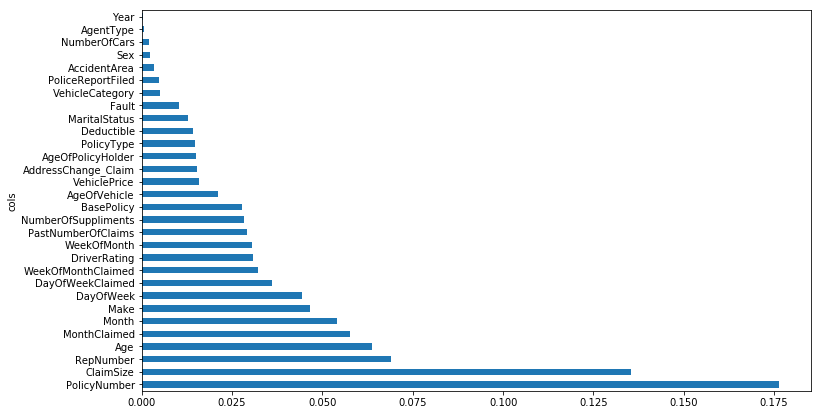

In [148]:
fi = rf_feat_importance(m, df)
plot_fi(fi[:30]);

In [226]:
import seaborn as sns

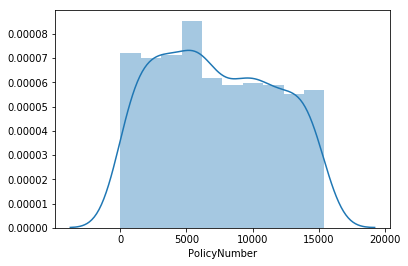

In [227]:
fraud=customers.loc[customers["FraudFound_P"]==1]
normal=customers.loc[customers["FraudFound_P"]==0]
sns.distplot(fraud.PolicyNumber)
plt.show()

In [246]:
df.columns[np.abs(corrmat["PolicyNumber"]) > 0.85]

Index(['PolicyNumber', 'Year'], dtype='object')

In [253]:
display_all(X_valid.sort_values(['PolicyNumber']))

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Age_na,DriverRating_na
9,1,5,5,7,1,3,2,1,2,3,0.0,2,2,1,6,14,12,400,3.0,4,3,4,8,1,1,1,1,4,4,1,1994,2,82211.859262,False,False
14,5,4,4,14,2,1,5,5,2,3,32.0,1,3,2,1,19,6,400,3.0,4,3,1,6,5,1,1,1,4,4,1,1994,3,5906.597313,False,True
16,1,2,6,3,2,1,1,2,2,2,47.0,1,2,1,1,22,13,400,2.0,4,3,1,7,7,1,1,1,4,3,2,1994,2,1298.643912,False,False
18,3,3,4,7,2,4,6,4,2,2,21.0,1,2,1,2,27,1,400,2.0,4,3,3,4,4,1,1,1,3,4,1,1994,2,84964.753582,False,False
33,11,4,4,10,2,5,11,4,2,2,37.0,1,3,2,2,48,13,400,3.0,4,3,2,4,6,1,1,1,3,4,1,1994,3,13736.927924,False,False
39,12,3,1,10,2,3,12,3,2,2,49.0,2,1,1,1,56,7,400,4.0,4,3,4,7,7,1,1,1,2,4,1,1994,1,6290.340494,False,False
42,5,1,1,7,1,3,5,4,2,3,0.0,1,3,2,6,59,15,400,4.0,4,3,4,8,1,1,1,1,4,4,1,1994,3,79417.328822,False,False
46,11,4,7,7,2,5,1,3,2,3,0.0,2,1,1,6,63,3,400,2.0,4,3,2,8,1,1,1,1,4,4,1,1994,1,77167.223246,False,False
50,3,3,5,12,2,5,3,3,2,3,40.0,2,2,1,6,67,16,400,2.0,4,3,1,6,6,1,1,1,3,4,1,1994,2,50099.557057,False,False
90,2,1,5,7,1,5,3,3,2,3,0.0,1,1,1,6,121,8,400,3.0,4,3,4,8,1,1,1,1,4,4,1,1994,1,62822.322409,False,False


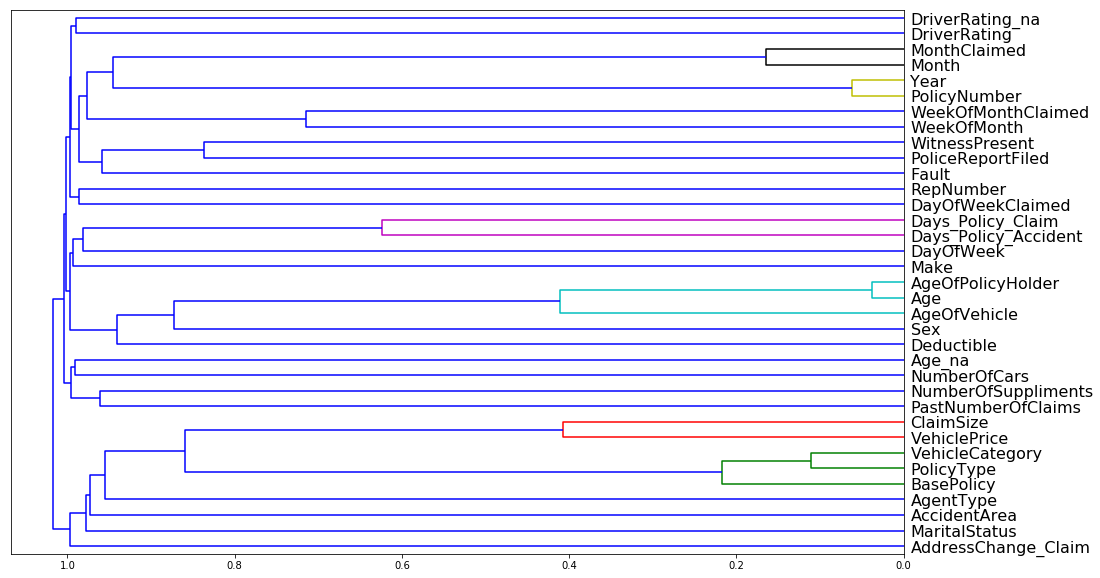

In [254]:
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

In [29]:
from sklearn.svm import OneClassSVM

m = OneClassSVM(gamma='scale', degree=3, kernel='rbf')
m.fit(X_train)

y_prob = m.predict(X_valid)

y_prob[y_prob == -1].sum()

y_pred = np.array([0 if i==-1 else 1 for i in y_prob])

error(y_pred, y_valid)

In [146]:
m = IsolationForest(behaviour='new', n_jobs=-1, n_estimators=100, max_features=0.5, bootstrap=True)
m.fit(X_train)

y_prob = m.predict(X_valid)

y_prob[y_prob == 1].sum()

y_pred = np.array([1 if i==-1 else 0 for i in y_prob])

error(y_pred, y_valid)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


IsolationForest(behaviour='new', bootstrap=True, contamination='legacy',
        max_features=0.5, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=None, verbose=0)

In [151]:
from sklearn.neighbors import LocalOutlierFactor

m = LocalOutlierFactor(novelty=True, n_neighbors=30, algorithm='ball_tree', leaf_size=40, p=5)
m.fit(X_train)

y_prob = m.predict(X_valid)

y_pred = np.array([1 if i==-1 else 0 for i in y_prob])

error(y_pred, y_valid)

In [37]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [32]:
rus = RandomOverSampler(random_state=42)

X_res, y_res = rus.fit_resample(X_train, y_train)

y_res[y_res == 1].sum()

In [36]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

print('Removed indexes:', id_tl.shape)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

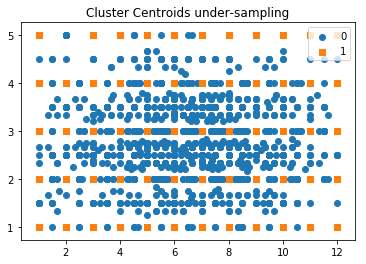

In [38]:
cc = ClusterCentroids(ratio={0: 6000}, n_jobs=-1)
X_cc, y_cc = cc.fit_sample(X_train, y_train)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

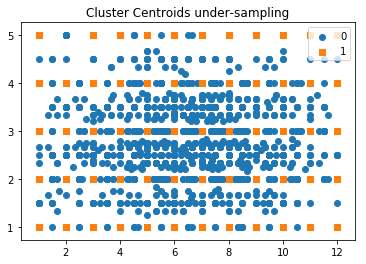

In [44]:
cc = ClusterCentroids(ratio={0: 6650}, n_jobs=-1)
X_cc_full, y_cc_full = cc.fit_sample(df, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

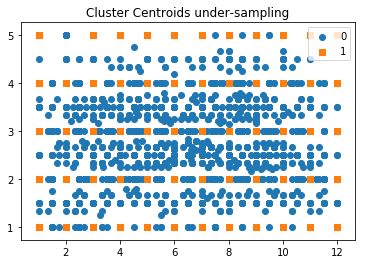

In [182]:
cc = ClusterCentroids(ratio={0: 6000}, n_jobs=4)
X_cc, y_cc = cc.fit_sample(X_train.drop('PolicyNumber', axis=1), y_train)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

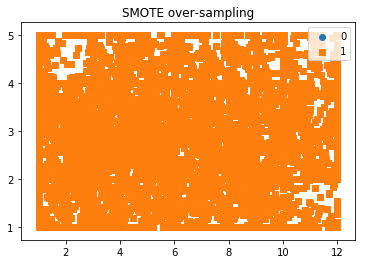

In [105]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

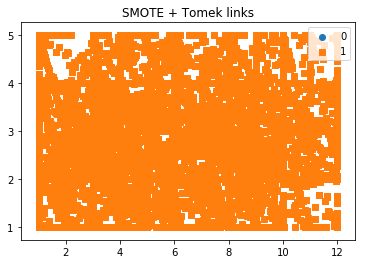

In [113]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [115]:
(y_smt[y_smt == 1]).shape

(8314,)

In [116]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_smt, y_smt)
print_score(m)

[[9169  105]
 [  70  486]]
0.847428073234525
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9274
           1       0.82      0.87      0.85       556

   micro avg       0.98      0.98      0.98      9830
   macro avg       0.91      0.93      0.92      9830
weighted avg       0.98      0.98      0.98      9830

[[1566   86]
 [  75    8]]
0.0903954802259887
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1652
           1       0.09      0.10      0.09        83

   micro avg       0.91      0.91      0.91      1735
   macro avg       0.52      0.52      0.52      1735
weighted avg       0.91      0.91      0.91      1735



In [111]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_sm, y_sm)
print_score(m)

[[9199   72]
 [  40  519]]
0.9026086956521738
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9271
           1       0.88      0.93      0.90       559

   micro avg       0.99      0.99      0.99      9830
   macro avg       0.94      0.96      0.95      9830
weighted avg       0.99      0.99      0.99      9830

[[1584   78]
 [  57   16]]
0.19161676646706585
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1662
           1       0.17      0.22      0.19        73

   micro avg       0.92      0.92      0.92      1735
   macro avg       0.57      0.59      0.58      1735
weighted avg       0.93      0.92      0.93      1735



In [150]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_cc, y_cc)
print_score(m)

[[8438   69]
 [ 801  522]]
0.5454545454545454
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8507
           1       0.88      0.39      0.55      1323

   micro avg       0.91      0.91      0.91      9830
   macro avg       0.90      0.69      0.75      9830
weighted avg       0.91      0.91      0.90      9830

[[1471   54]
 [ 170   40]]
0.26315789473684215
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1525
           1       0.43      0.19      0.26       210

   micro avg       0.87      0.87      0.87      1735
   macro avg       0.66      0.58      0.60      1735
weighted avg       0.84      0.87      0.85      1735



In [56]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_tl, y_tl)
print_score(m)

[[9187   96]
 [  52  495]]
0.8699472759226713
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9283
           1       0.84      0.90      0.87       547

   micro avg       0.98      0.98      0.98      9830
   macro avg       0.92      0.95      0.93      9830
weighted avg       0.99      0.98      0.99      9830

[[1593   71]
 [  48   23]]
0.2787878787878788
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1664
           1       0.24      0.32      0.28        71

   micro avg       0.93      0.93      0.93      1735
   macro avg       0.61      0.64      0.62      1735
weighted avg       0.94      0.93      0.94      1735



In [57]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_res, y_res)
print_score(m)

[[9186    0]
 [  53  591]]
0.957085020242915
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9186
           1       1.00      0.92      0.96       644

   micro avg       0.99      0.99      0.99      9830
   macro avg       1.00      0.96      0.98      9830
weighted avg       0.99      0.99      0.99      9830

[[1582   65]
 [  59   29]]
0.3186813186813187
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1647
           1       0.31      0.33      0.32        88

   micro avg       0.93      0.93      0.93      1735
   macro avg       0.64      0.65      0.64      1735
weighted avg       0.93      0.93      0.93      1735

